In [1]:
import pandas as pd
from urllib.parse import urlencode
import requests
import calendar
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# внешняя ссылка на таблицу
df_url = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
df_final_url = base_url + urlencode(dict(public_key=df_url))
response = requests.get(df_final_url)
df_download_url = response.json()['href']

customers = pd.read_csv(df_download_url)

In [3]:
# внешняя ссылка на таблицу
df_url = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
df_final_url = base_url + urlencode(dict(public_key=df_url))
response = requests.get(df_final_url)
df_download_url = response.json()['href']

orders = pd.read_csv(df_download_url)

In [4]:
# внешняя ссылка на таблицу
df_url = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
df_final_url = base_url + urlencode(dict(public_key=df_url))
response = requests.get(df_final_url)
df_download_url = response.json()['href']

items = pd.read_csv(df_download_url)

In [5]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### "Покупкой" будем считать заказ "доставленный пользователю" или "delivered". В этом, и только в этом случае сделка является завершенной

# Задача 1

#### Сколько у нас пользователей, которые совершили покупку только один раз?

In [6]:
orders_merged = orders.merge(customers, on='customer_id', how='left') \
    .drop(columns=['customer_zip_code_prefix', 'customer_city', 'customer_state'])
orders_delivered = orders_merged.query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index=False).agg({'order_id': 'count'}) \
    .sort_values(by=['order_id'], ascending=False)

In [7]:
orders_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c


In [8]:
orders_delivered.count()

customer_unique_id    93358
order_id              93358
dtype: int64

## пользователей совершивших покупку только один раз 93358 человек

# Задача 2

#### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [9]:
# форматируем столбцы в подходящие типы данных
orders_merged['order_purchase_timestamp']      = pd.to_datetime(orders_merged['order_purchase_timestamp'])
orders_merged['order_approved_at']             = pd.to_datetime(orders_merged['order_approved_at'])
orders_merged['order_delivered_carrier_date']  = pd.to_datetime(orders_merged['order_delivered_carrier_date'])
orders_merged['order_delivered_customer_date'] = pd.to_datetime(orders_merged['order_delivered_customer_date'])
orders_merged['order_estimated_delivery_date'] = pd.to_datetime(orders_merged['order_estimated_delivery_date'])

In [10]:
orders_merged.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
dtype: object

In [11]:
orders_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c


In [12]:
orders_not_delivered = orders_merged.query("order_status in ['canceled', 'unavailable']")


In [13]:
orders_not_delivered = orders_not_delivered.assign(month=orders_not_delivered["order_purchase_timestamp"].dt.strftime('%Y-%m'))


In [14]:
orders_not_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,month
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,41fc647b8c6bd979b1b6364b60471b50,2017-11
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,8ea097b1824dbd4d17af71b0afe04301,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0e634b16e4c585acbd7b2e8276ce6677,2018-01
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,c4ebedb09beb89cc0314c5c0c33f8053,2018-01
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,596ed6d7a35890b3fbac54ec01f69685,2017-08
...,...,...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,a33e0969408919ba06779f497ead93ec,2018-01
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,e90598185d2427a35e32ef241a5c04aa,2018-08
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,d05c44a138277ad325d915c6b7ccbcdf,2018-09
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,e72a90a2b29fe1a8795b284aaaa3246f,2017-08


In [15]:
orders_not_delivered_byMonth = orders_not_delivered \
    .groupby(['month', 'order_status'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .pivot(index='month', columns='order_status', values='order_id')
orders_not_delivered_byMonth

order_status,canceled,unavailable
month,,
2016-09,2.0,NaN
2016-10,24.0,7.0
2017-01,3.0,10.0
2017-02,17.0,45.0
2017-03,33.0,32.0
2017-04,18.0,9.0
2017-05,29.0,31.0
2017-06,16.0,24.0
2017-07,28.0,52.0


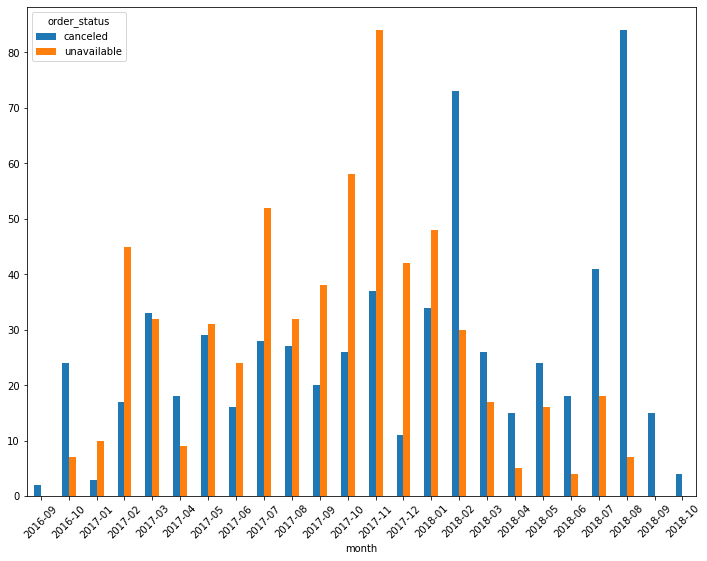

In [16]:
orders_not_delivered_byMonth.plot(kind='bar', figsize=(12, 9), rot=45)

In [17]:
orders_not_delivered_byMonth.mean()

order_status
canceled       26.041667
unavailable    29.000000
dtype: float64

#### В среднем не доставляются заказы по причинам: 
1. статус заказа отменен (canceled) = 26
2. статус заказа недоступен (unavailable) = 29

# Задача 3

#### По каждому товару определить, в какой день недели товар чаще всего покупается

In [18]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [19]:
items_merged = items.merge(orders[['order_id', 'order_purchase_timestamp', 'order_status']], on='order_id', how='left')
items_merged['shipping_limit_date'] = pd.to_datetime(items_merged['shipping_limit_date'])
items_merged['order_purchase_timestamp'] = pd.to_datetime(items_merged['order_purchase_timestamp'])

In [20]:
items_merged['day_of_week'] = items_merged.order_purchase_timestamp.dt.day_name()

In [21]:
items_query = items_merged.query('order_status == "delivered"') \
    .groupby(['product_id', 'day_of_week'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'items_per_weekday'}) \
    .sort_values(by='items_per_weekday', ascending=False)
items_query = items_query.drop_duplicates(subset='product_id', keep='first')
items_query = items_query.drop(columns='items_per_weekday')

In [22]:
items_query

,product_id,day_of_week
15597,422879e10f46682990de24d770e7f83d,Wednesday
35751,99a4788cb24856965c36a24e339b6058,Monday
40183,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday
19711,53b36df67ebb7c41585e8d54d6772e08,Tuesday
13271,389d119b48cf3043d311335e499d9c6b,Thursday
...,...,...
23483,64123627d4116a2bc8284f1bc0a257f3,Saturday
23491,6413f8d0daa3a38887a14917589e7da5,Wednesday
23493,641444946fe3a839d726c32804cd1aff,Tuesday
23494,6416e0ecd625ef4adf18658a9aca2e10,Thursday


# Задача 4

#### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [23]:
orders_per_month = orders_merged.assign(month=orders_merged["order_delivered_customer_date"].dt.month)
orders_per_month = orders_per_month.groupby('month', as_index=False).agg({'order_id': 'count'})
orders_per_month = orders_per_month.rename(columns={"order_id": "purchase_count"})

In [24]:
def weeks_in_month(year, month):
    weeks = calendar.monthcalendar(year, month)
    count = 0

    for row in weeks:
        for num in row:
            if num > 0:
                count += 1
    num_of_weeks = count / 7
    return num_of_weeks

In [25]:
week = pd.DataFrame()
week['order_delivered_customer_date'], week['month_number'] = orders_merged['order_delivered_customer_date'].dt.year, orders_merged['order_delivered_customer_date'].dt.month
week = week.astype('Int32')
week = week.assign(order_id=orders['order_id'])
week = week.groupby(['order_delivered_customer_date', 'month_number'], as_index=False).agg({'order_id': 'count'})
week = week.rename(columns={'order_id': 'purchases_per_month'})

In [26]:
def calculate(row):
    return row['purchases_per_month'] / weeks_in_month(row['order_delivered_customer_date'], row['month_number'])

week['purchases_per_week'] = week.apply(calculate, axis=1)

In [27]:
week

,order_delivered_customer_date,month_number,purchases_per_month,purchases_per_week
0,2016,10,208,46.967742
1,2016,11,60,14.000000
2,2016,12,4,0.903226
3,2017,1,283,63.903226
4,2017,2,1351,337.750000
5,2017,3,2382,537.870968
6,2017,4,1849,431.433333
7,2017,5,3751,847.000000
8,2017,6,3223,752.033333
9,2017,7,3455,780.161290


# Задача 5

#### Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц

In [28]:
orders_merged.duplicated(subset=['order_purchase_timestamp', 'customer_unique_id']).sum()

292

In [29]:
cohort_df = pd.DataFrame()
cohort_df['customer_unique_id'] = orders_merged['customer_unique_id']
cohort_df['order_id'] = orders_merged['order_id']
cohort_df['order_purchase_timestamp'] = orders_merged['order_purchase_timestamp']
cohort_df['order_status'] = orders_merged['order_status']
cohort_df['product_id'] = items['product_id']
cohort_df['price'] = items['price']
cohort_df = cohort_df.query('order_status == "delivered"')
cohort_df = cohort_df.drop(columns='order_status')
cohort_df = cohort_df.groupby(['order_purchase_timestamp', 'customer_unique_id'], as_index=False) \
    .agg({'order_id': max,
          'product_id': max,
          'price': sum})

In [30]:
cohort_df


,order_purchase_timestamp,customer_unique_id,order_id,product_id,price
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,34dc9ba20762290886d4d94d07a102e3,119.00
1,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,3b697a20d9e427646d92567910af6d57,fb6782985a98aa8a59238f58239f6f1e,79.99
2,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,be5bc2f0da14d8071e2d45451ad119d9,8e26479962cb257aba82c608c10469e5,45.00
3,2016-10-03 21:13:36,61db744d2f835035a5625b59350c6b63,a41c8759fbe7aab36ea07e038b2d4465,387e781bdd254dd8821e6194af0fa8d7,102.90
4,2016-10-03 22:06:03,8d3a54507421dbd2ce0a1d58046826e0,d207cc272675637bfed0062edffd0818,096793eddadb8067748a5a0ff98ac8fb,129.90
...,...,...,...,...,...
96206,2018-08-29 12:25:59,7a22d14aa3c3599238509ddca4b93b01,52018484704db3661b98ce838612b507,656e0eca68dcecf6a31b8ececfabe3e8,94.00
96207,2018-08-29 14:18:23,5c58de6fb80e93396e2f35642666b693,0b223d92c27432930dfe407c6aea3041,8feb43a054893da80044ad0f693fd0ad,49.00
96208,2018-08-29 14:18:28,7febafa06d9d8f232a900a2937f04338,168626408cb32af0ffaf76711caae1dc,4a9947ec1fcec2b3321193ed5590e8cb,59.00
96209,2018-08-29 14:52:00,b701bebbdf478f5500348f03aff62121,03ef5dedbe7492bdae72eec50764c43f,c7b3b8509e06ae21abdd78b541215cda,118.90


In [31]:
cohort_df['tx_month'] = cohort_df['order_purchase_timestamp'].apply(lambda x: datetime.date(x.year, x.month, 1))
cohort_df['acq_month'] = cohort_df.groupby('customer_unique_id')['tx_month'].transform('min')
cohort_df.loc[cohort_df['tx_month'] != cohort_df['acq_month']]

,order_purchase_timestamp,customer_unique_id,order_id,product_id,price,tx_month,acq_month
267,2017-01-05 11:56:06,f7b981e8a280e455ac3cbe0d5d171bd1,ec7a019261fce44180373d45b442d78f,c1ad8ac66c91ad301cefc322ba2adf31,649.00,2017-01-01,2016-12-01
1479,2017-02-07 19:06:47,a7bbfaf8a288c45dc38d4693535dd63f,ea8dfcfa112dd9df068022a643e58a22,44a6e4ecf7b48f87481c243383b1c4cf,39.90,2017-02-01,2017-01-01
1597,2017-02-08 23:08:53,c76762dfb642ac154475239639f7f8f4,b3e176098b9f9f6122d37fa3cb06279b,75a0da72d64d961e5ad456641416fa20,59.90,2017-02-01,2017-01-01
2667,2017-03-01 08:08:10,e23daf58ce481f3d38066e654ef610cb,450c49623c365a4edcf0c5a2c93aa7c9,b7a60a397d4efd05c1b5d398fb9f9097,2399.00,2017-03-01,2017-02-01
2678,2017-03-01 10:08:34,bd0f8d6b6bc185debdf79f91ba30fdc6,96e46ea85cec2195f5ba671b9b319c81,c9e5a053551073d27ded320bd05971b4,38.70,2017-03-01,2017-02-01
...,...,...,...,...,...,...,...
96102,2018-08-27 09:54:35,e0836a97eaae86ac4adc26fbb334a527,c7756342d355d13eea40a754b6602da6,5f504b3a1c75b73d6151be81eb05bdc9,610.00,2018-08-01,2018-06-01
96133,2018-08-27 17:18:42,d44f553a3663a6323c901cf1f0a47c87,57d0641da97fead93c9541a7c3b1fc75,f2399cabe080029634d12cec4f60dbf0,94.90,2018-08-01,2018-07-01
96157,2018-08-27 22:59:03,41d57ab847e5ccbe403f46b07ee577d6,68dd7c23e8b6c1e5f3ad16be5dd4bdf6,83b00325c13c44245b2c3a2befa62a0e,179.99,2018-08-01,2018-03-01
96168,2018-08-28 10:57:13,34b0cd95480e55c2a701293a2b9671b3,b18f96d97651133bd9a491945fa1d3bd,b3b0bce74668bf355cbd94db1e4d17b9,24.98,2018-08-01,2018-04-01


In [32]:
def diff_month(x): 
    d1 = x['tx_month'] 
    d2 = x['acq_month'] 
    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1 
cohort_df['cohort_idx'] = cohort_df.apply(lambda x: diff_month(x), axis=1) 

In [39]:
def get_cohort_matrix(data, var='customer_unique_id', fun=pd.Series.nunique):
    cd = data.groupby(['acq_month', 'cohort_idx'])[var].apply(fun).reset_index()
    cc = cd.pivot_table(index = 'acq_month',
                        columns = 'cohort_idx',
                        values = var)
    cs = cc.iloc[:,0]
    retention = cc.divide(cs, axis = 0)
    retention = retention.round(3) * 100
    return cc, retention

In [40]:
cc, retention = get_cohort_matrix(cohort_df)
cc.fillna('')

cohort_idx,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
acq_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,,,,,,,,,,,,,,,,,,,
2016-10-01,262.0,,,,,,1,,,1,,1,,1,,1,,1,2,2
2016-12-01,1.0,1,,,,,,,,,,,,,,,,,,
2017-01-01,717.0,2,2,1,3,1,3,1,1,,3,1,5,3,1,1,2,3,1,
2017-02-01,1628.0,3,5,2,7,2,4,3,2,3,2,5,2,3,2,1,1,3,,
2017-03-01,2503.0,11,9,10,9,4,4,8,8,2,9,3,5,3,4,6,2,3,,
2017-04-01,2256.0,14,5,4,6,6,8,7,7,4,6,2,1,1,2,2,3,,,
2017-05-01,3451.0,16,16,10,10,11,14,5,9,9,9,12,8,1,6,7,,,,
2017-06-01,3037.0,15,12,13,9,12,11,7,4,6,9,11,5,5,7,,,,,


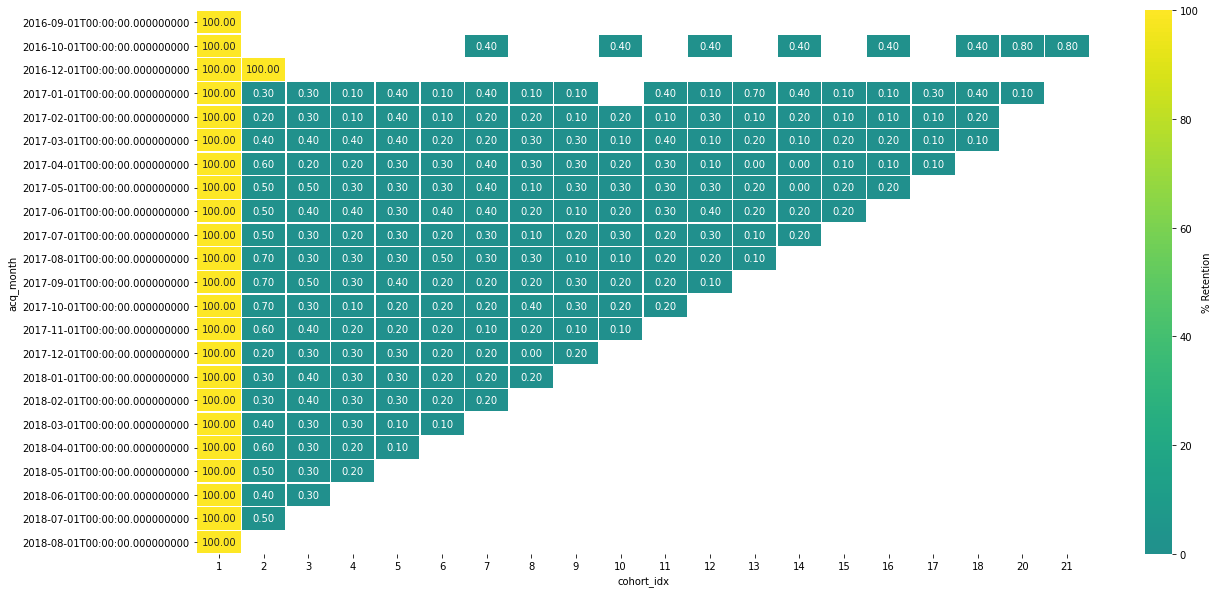

In [41]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(retention, vmin=0, vmax=100, cmap="viridis", center=0.1, annot=True, fmt=".2f",
            linewidths=.4, ax=ax, cbar_kws={'label': '% Retention'})

когорты 2017-09-01 и 2017-11-01 числа показывает наивысший 0.6% !!! retention на 3й-месяц.
показатель retention rate критично мал для e-commerce компании.

# Задача 6

#### Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики:
- R - время от последней покупки пользователя до текущей даты,
- F - суммарное количество покупок у пользователя за всё время, 
- M - сумма покупок за всё время.
#### Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания:
- RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней,
- frequency от 2 до 5 заказов в неделю, 
- monetary от 1780 до 3560 рублей в неделю.

методология RFM:
1. рассчитать recency = количество дней с момента последней покупки
2. рассчитать frequency = количество покупок у пользователя за все время
3. рассчитать monetary = общая сумма покупок за исследуемый период
4. найти квантили для каждого из этих измерений
5. оценить каждое измерение в зависимости от того, в каком квантиле оно находится
6. объединить R, F, M чтобы получить оценку RFM
7. сопоставить показатели RF с сегментами

### Подготовка данных
##### создадим датафрейм с данными о продажах

In [43]:
orders_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c


In [44]:
RFM_df = orders_merged.merge(items, on='order_id')

In [45]:
RFM_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [46]:
print('Orders from `{}` to `{}`'.format(RFM_df['order_purchase_timestamp'].min(),
                                    RFM_df['order_purchase_timestamp'].max()))

Orders from `2016-09-04 21:15:19` to `2018-09-03 09:06:57`


период ровно два года. Учитывая что 2017 и 2018 года не были високосными, будем чситать RFM за 730 дней

In [47]:
period = 730

##### нам нужно знать сколько раз покупатель совершил покупку. поэтому сгруппируем данные по order_id, и посчитаем суммы заказов

In [48]:
RFM_DF = RFM_df.groupby(['customer_unique_id', 'order_id', 'order_purchase_timestamp'], as_index=False) \
    .agg({'price': 'sum'})

In [49]:
RFM_DF

,customer_unique_id,order_id,order_purchase_timestamp,price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00
...,...,...,...,...
98661,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,1570.00
98662,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,64.89
98663,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,89.90
98664,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,115.00


### Расчет recency, frequency, monetary

In [50]:
now = RFM_df['order_purchase_timestamp'].max()

In [51]:
RFM_DF['DaysSinceOrder'] = RFM_DF['order_purchase_timestamp'].apply(lambda x: (now - x).days)

In [52]:
RFM_DF

,customer_unique_id,order_id,order_purchase_timestamp,price,DaysSinceOrder
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90,118
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00,541
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99,325
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00,292
...,...,...,...,...,...
98661,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,1570.00,451
98662,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,64.89,266
98663,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,89.90,572
98664,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,115.00,123


In [53]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= 
                                               now - 
                                               datetime.timedelta(days=period)])
}
rfm = RFM_DF.groupby('customer_unique_id', as_index=False).agg(aggr) \
    .rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency'})

In [54]:
rfm.sort_values(by='Frequency', ascending=False)

,customer_unique_id,Recency,Frequency
52597,8d50f5eadf50201ccdcedfb9e2ac8455,13,16
23302,3e43e6105506432c953e165fb2acf44c,187,9
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,200,7
37532,6469f99c1f9dfae7733b25662e7f1782,67,7
75560,ca77025e7201e3b30c44b472ff346268,93,7
...,...,...,...
32272,5657f9f721c16800a66c21081d46b18d,287,1
32271,5657dfebff5868c4dc7e8355fea865c4,295,1
32270,5657596addb4d7b07b32cd330614bdf8,304,1
32269,5656eb169546146caeab56c3ffc3d268,38,1


In [55]:
grouped = RFM_DF.groupby('customer_unique_id', as_index=False).agg({'price': 'sum'})
rfm = rfm.merge(grouped, on='customer_unique_id')
rfm = rfm.rename(columns={'price': 'Monetary'})

In [56]:
rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00


## Посчитаем значения R, F, M  
Для RFM-сегментации нам необходимо разбить значнеия на несколько групп. Будем делить на три группы.
Для того, чтобы группировать сегменты на равные части, будем использовать квантили для разбиения значений.

In [57]:
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.33, .67]).to_dict()
quantiles

{'Recency': {0.33: 152.0, 0.67: 297.0},
 'Frequency': {0.33: 1.0, 0.67: 1.0},
 'Monetary': {0.33: 57.99, 0.67: 129.0}}

#### Напишем функции для ранжирования значений от 1 до 3. Меньшее значение "Recency" лучше, тогда как более высокие значения "Frequency" и "Monetary" лучше.

In [58]:
def r_score(x):
    if x <= quantiles['Recency'][.33]:
        return 3
    elif x <= quantiles['Recency'][.67]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quantiles[c][.33]:
        return 1
    elif x <= quantiles[c][.67]:
        return 2
    else:
        return 3

In [59]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [60]:
rfm['RFM score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,3,213
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,1,1,3,113
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,2,1,2,212
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,1,1,2,112
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,3,1,2,312


RFM дает разбивку на 27 сегментов.  
Будем работать с 9 сегментами основаннх на R и F оценках:

In [61]:
segment = {'Segment': ['champions', 'loyal customers', 'new customers', 'promising', 'need attention', 'can\'t loose them', 'about to sleep', 'at risk', 'hibernating'],
          'Description': ['покупают часто и много', 'покупают регулярно', 'покупал недавно, но не часто', 'недавние покупатели, с частотой покупок выше среднего', 'RFM оценки выше среднего, но возможно покупали давно', 'покупали давно и не так часто. Можем потерять, если не активировать', 'покупали часто, но давно. необходимо вернуть', 'часто покупали, но давно не возвращались', 'Последняя покупка была давно и в небольшем количестве. Могут быть потеряны']}
segment_df = pd.DataFrame(data=segment)
segment_df

,Segment,Description
0,champions,покупают часто и много
1,loyal customers,покупают регулярно
2,new customers,"покупал недавно, но не часто"
3,promising,"недавние покупатели, с частотой покупок выше с..."
4,need attention,"RFM оценки выше среднего, но возможно покупали..."
5,can't loose them,"покупали давно и не так часто. Можем потерять,..."
6,about to sleep,"покупали часто, но давно. необходимо вернуть"
7,at risk,"часто покупали, но давно не возвращались"
8,hibernating,Последняя покупка была давно и в небольшем кол...


In [62]:
segt_map = {
    r'11': 'hibernating',
    r'12': 'at Risk',
    r'13': 'can\'t loose',
    r'21': 'about to sleep',
    r'22': 'need attention',
    r'23': 'loyal customers',
    r'31': 'new customers',
    r'32': 'promising',  
    r'33': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,1,3,313,new customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,1,1,311,new customers
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,1,1,111,hibernating
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,3,213,about to sleep
...,...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,1,1,3,113,hibernating
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,2,1,2,212,about to sleep
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,1,1,2,112,hibernating
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,3,1,2,312,new customers


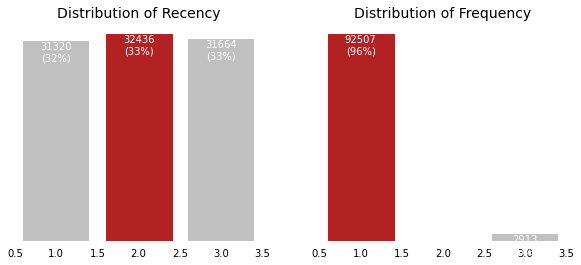

In [63]:
# Построим распределение клиентов по R и F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

Мы видим, что если давность совершения покупок распределены равномерно, то мало кто возвращается за повторной покупкой. (95% клиентов имеют частоту 1)

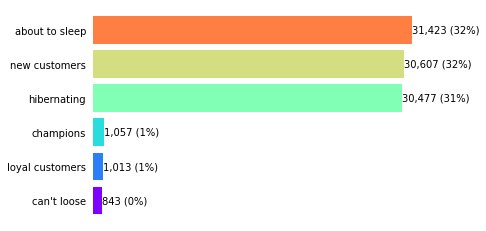

In [64]:
# Подсчитаем количество клиентов в каждом сегменте
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color=[plt.cm.rainbow(i/len(segments_counts)) for i in range(len(segments_counts))])
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Как мы видим из распределения сегментов, 95 процентов клиентов это "спящие", "новички" и "бездействующие".  
Вероятно специфика компании не позволяет провести качественный анализ за столь короткое время (2 года)